# Employee Attrition

Employee attrition measures the rate at which employees leave an organization over a specific period, impacting performance, culture, and finances. Attrition can be due to external job opportunities, personal reasons, dissatisfaction, or management issues. While some attrition is normal and healthy, excessive attrition can disrupt workforce stability, erode institutional knowledge, hinder productivity, and strain resources due to constant hiring and training.

High attrition rates can also negatively affect employee morale and job satisfaction. To counter these effects, organizations need effective retention strategies to foster engagement and stability.

### Types of Employee Attrition

1. **Involuntary Attrition**: Employees leave due to layoffs, termination, or furloughs, often because of organizational restructuring, performance issues, or economic factors. This can create instability and lower morale among remaining staff.

2. **Voluntary Attrition**: Employees leave on their own accord for reasons like career advancement, better offers, dissatisfaction, or personal reasons. This can lead to the loss of top talent and valuable knowledge, challenging an organization's retention efforts.

3. **Retirement**: Employees retire upon reaching the eligible age or choosing early retirement. This can result in the loss of experienced personnel and create gaps in institutional knowledge that are difficult to fill.

In [251]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [252]:
df = pd.read_csv('employee_attrition_train.csv')
pd.set_option('display.max_columns',None)

In [253]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,No,Travel_Rarely,1126.0,Research & Development,1.0,2,Medical,1,997,4,Male,66,3,4,Research Director,4,Divorced,17399,6615,9,Y,No,22,4,3,80,1,32,1,2,5,4,1,3
1,36.0,No,Travel_Rarely,216.0,Research & Development,6.0,2,Medical,1,178,2,Male,84,3,2,Manufacturing Director,2,Divorced,4941,2819,6,Y,No,20,4,4,80,2,7,0,3,3,2,0,1
2,21.0,Yes,Travel_Rarely,337.0,Sales,7.0,1,Marketing,1,1780,2,Male,31,3,1,Sales Representative,2,Single,2679,4567,1,Y,No,13,3,2,80,0,1,3,3,1,0,1,0
3,50.0,No,Travel_Frequently,1246.0,Human Resources,NaN,3,Medical,1,644,1,Male,99,3,5,Manager,2,Married,18200,7999,1,Y,No,11,3,3,80,1,32,2,3,32,5,10,7
4,52.0,No,Travel_Rarely,994.0,Research & Development,7.0,4,Life Sciences,1,1118,2,Male,87,3,3,Healthcare Representative,2,Single,10445,15322,7,Y,No,19,3,4,80,0,18,4,3,8,6,4,0


In [254]:
df.shape

(1029, 35)

In [255]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       893 non-null    float64
 1   Attrition                 1029 non-null   object 
 2   BusinessTravel            1024 non-null   object 
 3   DailyRate                 1002 non-null   float64
 4   Department                1029 non-null   object 
 5   DistanceFromHome          934 non-null    float64
 6   Education                 1029 non-null   int64  
 7   EducationField            1029 non-null   object 
 8   EmployeeCount             1029 non-null   int64  
 9   EmployeeNumber            1029 non-null   int64  
 10  EnvironmentSatisfaction   1029 non-null   int64  
 11  Gender                    1029 non-null   object 
 12  HourlyRate                1029 non-null   int64  
 13  JobInvolvement            1029 non-null   int64  
 14  JobLevel

The type of features is good

In [257]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,893.000000,1002.000000,934.000000,1029.000000,1029.0,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.0,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000
mean,37.930571,800.528942,9.930407,2.892128,1.0,1024.367347,2.683188,66.680272,2.713314,2.043732,2.712342,6449.796890,14250.629738,2.653061,15.260447,3.159378,2.689990,80.0,0.822157,11.196307,2.782313,2.748299,6.942663,4.215743,2.119534,4.005831
std,9.395978,408.109828,8.421791,1.053541,0.0,606.301635,1.096829,20.474094,0.710146,1.118918,1.096889,4794.525367,7088.757938,2.508186,3.665779,0.366206,1.077767,0.0,0.874662,7.857581,1.283401,0.697278,6.068322,3.658595,3.108651,3.522574
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,458.250000,2.000000,2.000000,1.0,496.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2814.000000,7950.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,37.000000,801.500000,8.000000,3.000000,1.0,1019.000000,3.000000,67.000000,3.000000,2.000000,3.000000,4735.000000,14295.000000,1.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,44.000000,1162.000000,16.000000,4.000000,1.0,1553.000000,4.000000,84.000000,3.000000,3.000000,4.000000,8446.000000,20392.000000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,2.000000,7.000000
max,60.000000,1496.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


* The 'EmployeeCount' column is of no use since each row represents one employee.
* The 'StandardHours' column contains the same value (80) for all rows, making it redundant.<br>

Therefore, we are removing these columns from the DataFrame.


In [258]:
del df['EmployeeCount']
del df['StandardHours']

### Missing Values

In [259]:
df.isna().sum() / len(df) * 100

Age                         13.216715
Attrition                    0.000000
BusinessTravel               0.485909
DailyRate                    2.623907
Department                   0.000000
DistanceFromHome             9.232264
Education                    0.000000
EducationField               0.000000
EmployeeNumber               0.000000
EnvironmentSatisfaction      0.000000
Gender                       0.000000
HourlyRate                   0.000000
JobInvolvement               0.000000
JobLevel                     0.000000
JobRole                      0.000000
JobSatisfaction              0.000000
MaritalStatus                0.485909
MonthlyIncome                0.000000
MonthlyRate                  0.000000
NumCompaniesWorked           0.000000
Over18                       0.000000
OverTime                     0.000000
PercentSalaryHike            0.000000
PerformanceRating            0.000000
RelationshipSatisfaction     0.000000
StockOptionLevel             0.000000
TotalWorking

In [260]:
df.dropna(inplace=True)

### Duplication

In [261]:
df['EmployeeNumber'].duplicated().sum()

0

There are no duplicate values ​​so there is no need for EmployeeNumber.

In [262]:
del df['EmployeeNumber']

## EDA

<Axes: xlabel='Attrition', ylabel='count'>

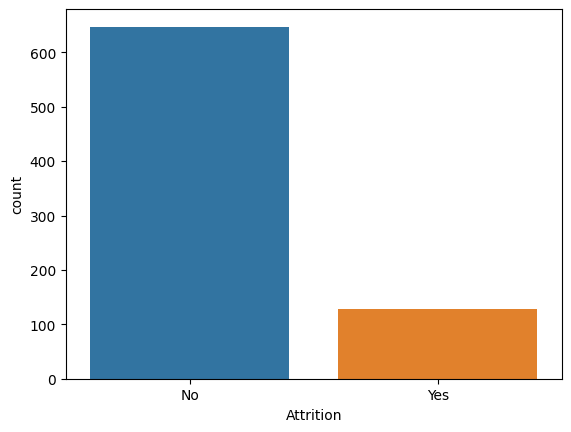

In [263]:
sns.countplot(df,x='Attrition')

The target value has no balance

### Pay not fair

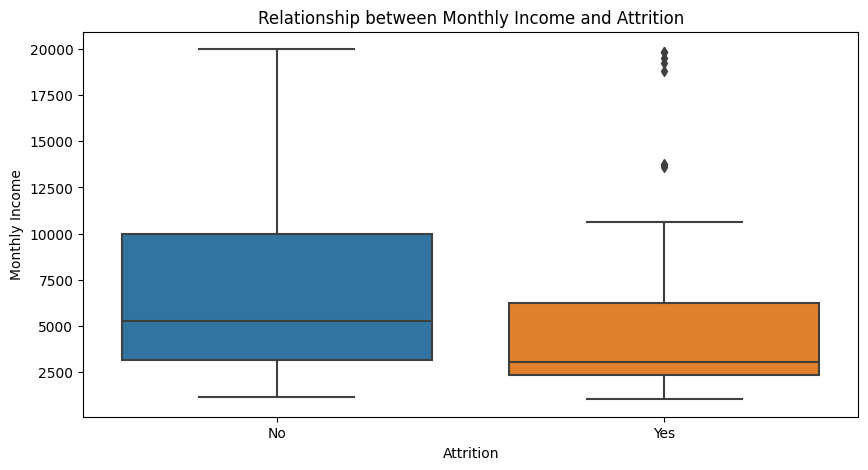

In [264]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('Relationship between Monthly Income and Attrition')
plt.xlabel('Attrition')
plt.ylabel('Monthly Income')
plt.show()

 employees with higher incomes are less likely to leave the company. However, the presence of high-income outliers among those who left indicates that salary is not the only factor influencing attrition.

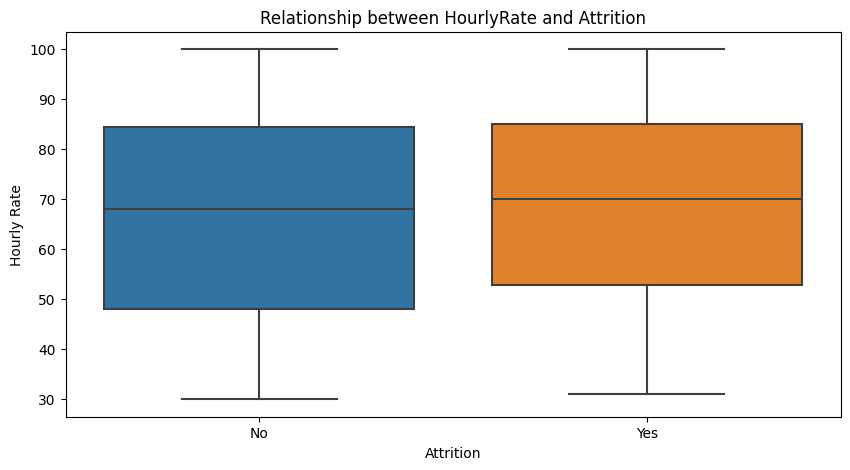

In [265]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Attrition', y='HourlyRate', data=df)
plt.title('Relationship between HourlyRate and Attrition')
plt.xlabel('Attrition')
plt.ylabel('Hourly Rate')
plt.show()

There doesn't appear to be a significant relationship between hourly rate and attrition

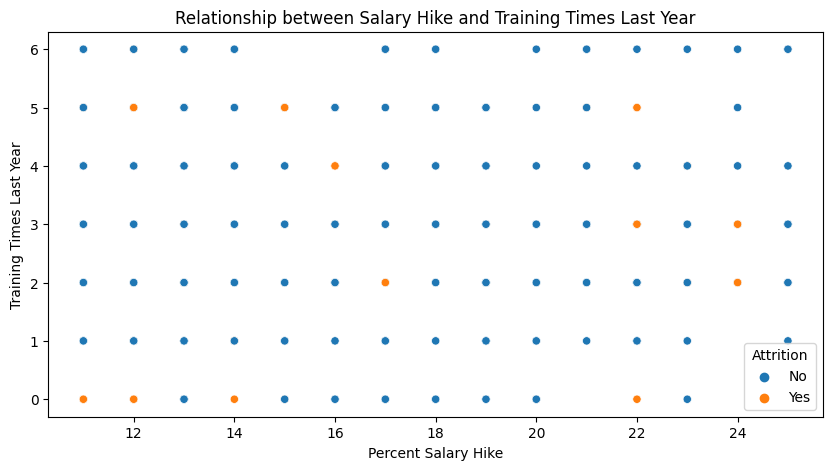

In [266]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='PercentSalaryHike', y='TrainingTimesLastYear',hue='Attrition', data=df)
plt.title('Relationship between Salary Hike and Training Times Last Year')
plt.xlabel('Percent Salary Hike')
plt.ylabel('Training Times Last Year')
plt.show()

There is no actual effect on the number of training hours worked with an increase in salary

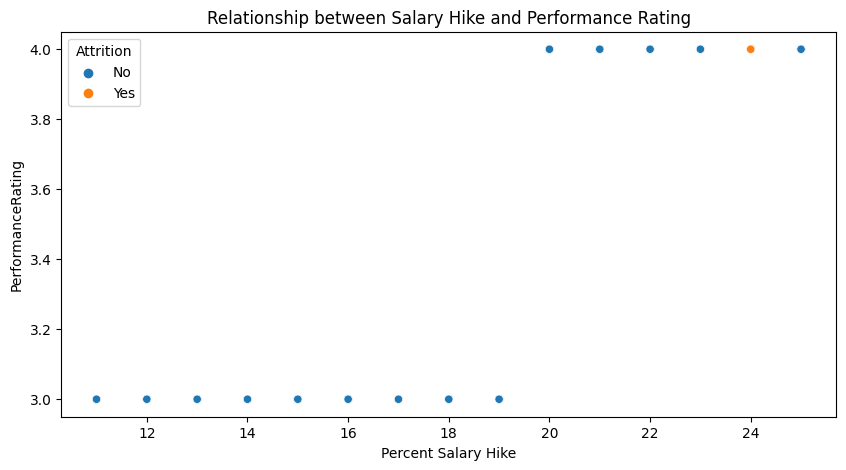

In [267]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='PercentSalaryHike', y='PerformanceRating',hue='Attrition', data=df)
plt.title('Relationship between Salary Hike and Performance Rating')
plt.xlabel('Percent Salary Hike')
plt.ylabel('PerformanceRating')
plt.show()

There is a higher salary increase for those with a performance rate of more than 3

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packa

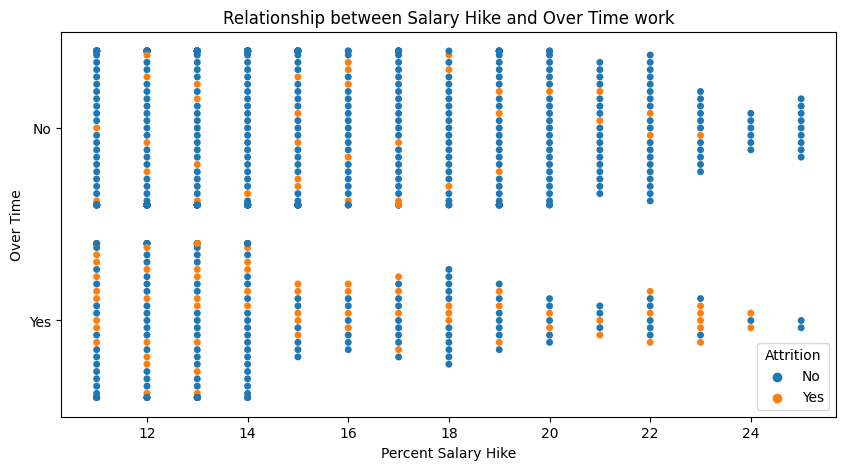

In [268]:
plt.figure(figsize=(10, 5))
sns.swarmplot(x='PercentSalaryHike', y='OverTime', hue='Attrition',data=df);
plt.title('Relationship between Salary Hike and Over Time work')
plt.xlabel('Percent Salary Hike')
plt.ylabel('Over Time')
plt.show()

The salary increase for people who work more hours is less, and this is a negative thing that makes the employee feel unappreciated

### Employee life

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


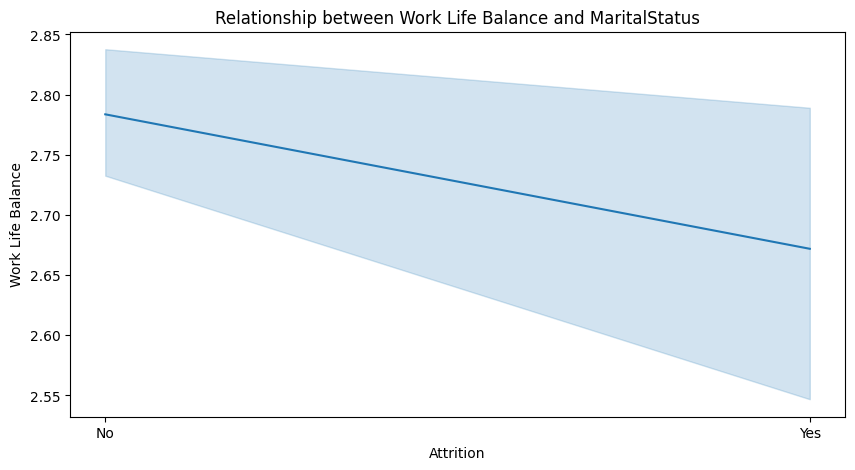

In [269]:
plt.figure(figsize=(10, 5))
sns.lineplot( x='Attrition',y='WorkLifeBalance',data=df)
plt.title('Relationship between Work Life Balance and MaritalStatus')
plt.xlabel('Attrition')
plt.ylabel('Work Life Balance')
plt.show()

Work-life balance has a small effect on leaving work

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


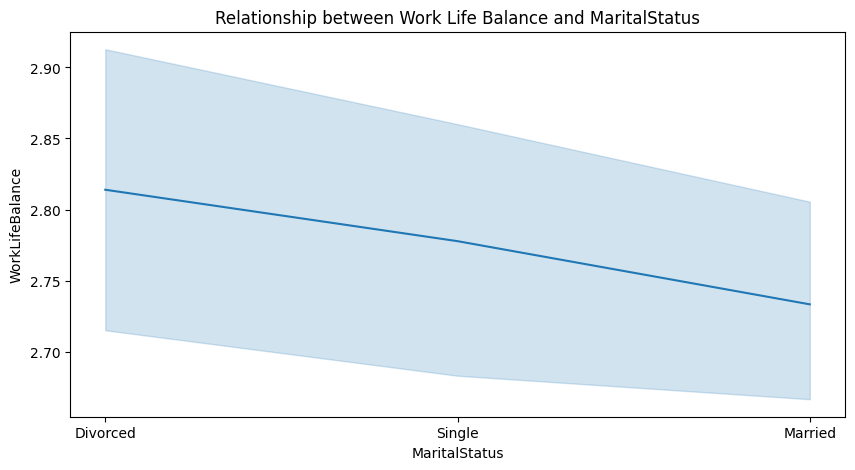

In [270]:
plt.figure(figsize=(10, 5))
sns.lineplot( x='MaritalStatus',y='WorkLifeBalance',data=df)
plt.title('Relationship between Work Life Balance and MaritalStatus')
plt.xlabel('MaritalStatus')
plt.ylabel('WorkLifeBalance')
plt.show()

There is no significant effect, but married people have the least balance between life and work

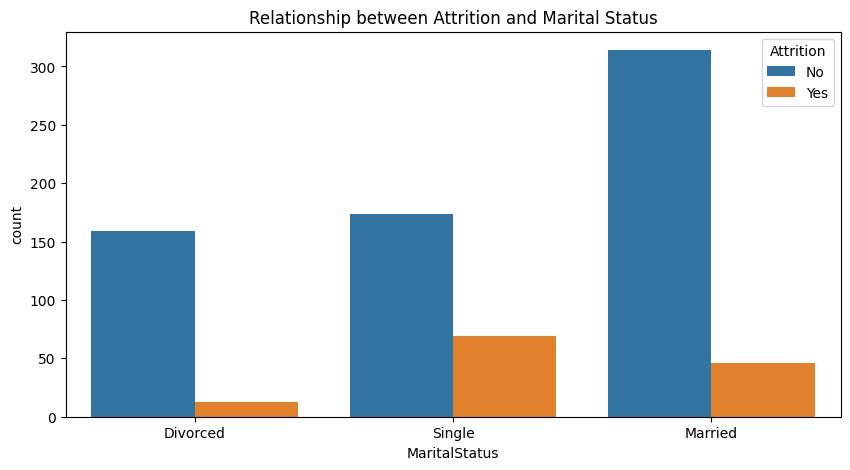

In [271]:
plt.figure(figsize=(10, 5))
sns.countplot(x='MaritalStatus', hue='Attrition', data=df)
plt.title('Relationship between Attrition and Marital Status')
plt.xlabel('MaritalStatus')
plt.ylabel('count')
plt.show()

Single people are more likely to leave work

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packa

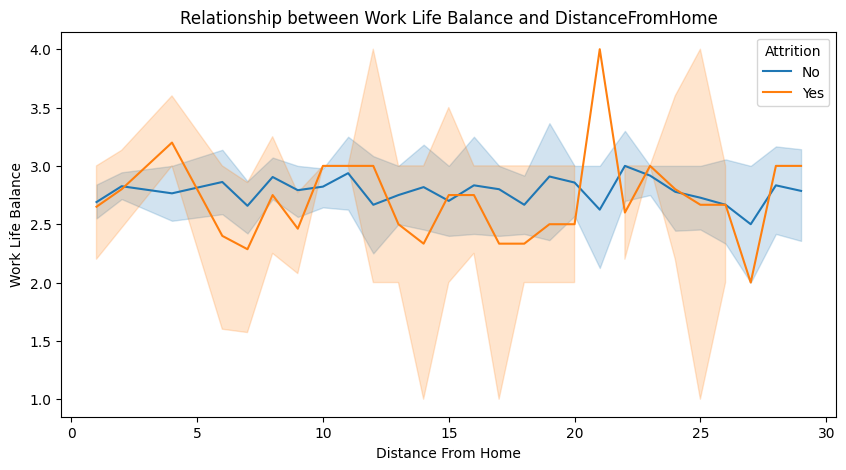

In [272]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='DistanceFromHome', y='WorkLifeBalance',hue='Attrition', data=df)
plt.title('Relationship between Work Life Balance and DistanceFromHome')
plt.xlabel('Distance From Home')
plt.ylabel('Work Life Balance')
plt.show()

work-life balance for both groups is similar across most distances, it implies that distance from home alone might not be a strong predictor of attrition

### Lack of opportunity

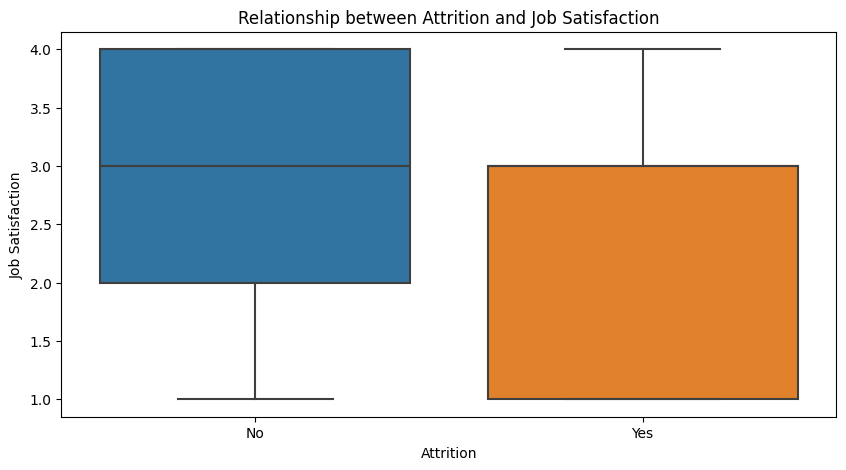

In [273]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Attrition', y='JobSatisfaction', data=df)
plt.title('Relationship between Attrition and Job Satisfaction')
plt.xlabel('Attrition')
plt.ylabel('Job Satisfaction')
plt.show()

It seems that job satisfaction has an impact on leaving work, as those whose job satisfaction is less than 3 tend to leave work


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


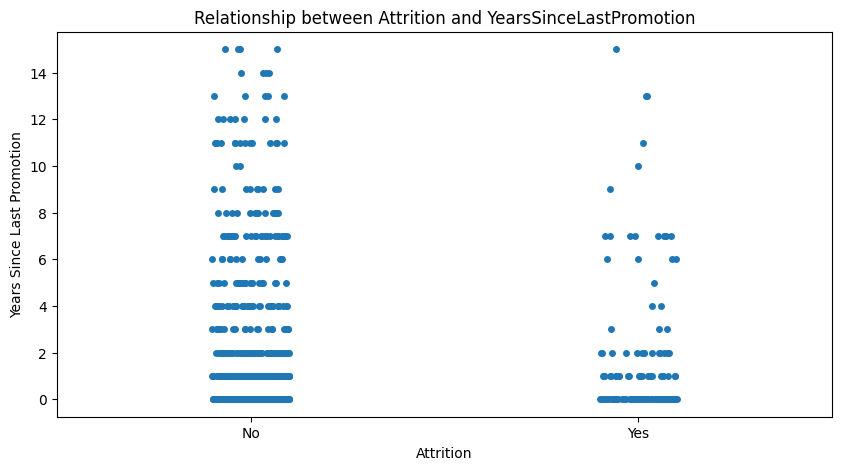

In [274]:
plt.figure(figsize=(10, 5))
sns.stripplot(x='Attrition', y='YearsSinceLastPromotion', data=df, jitter=True)
plt.title('Relationship between Attrition and YearsSinceLastPromotion')
plt.xlabel('Attrition')
plt.ylabel('Years Since Last Promotion')
plt.show()

* There is a noticeable cluster of employees who left the company within the 0-5 years range since their last promotion. This suggests that a lack of recent promotion might be a factor in their decision to leave,suggesting that recent promotions might help in retaining employees.
* There are fewer employees who left the company after more than 5 years since their last promotion compared to those who stayed. This might indicate that those who do not get promoted within a few years are more likely to leave.

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


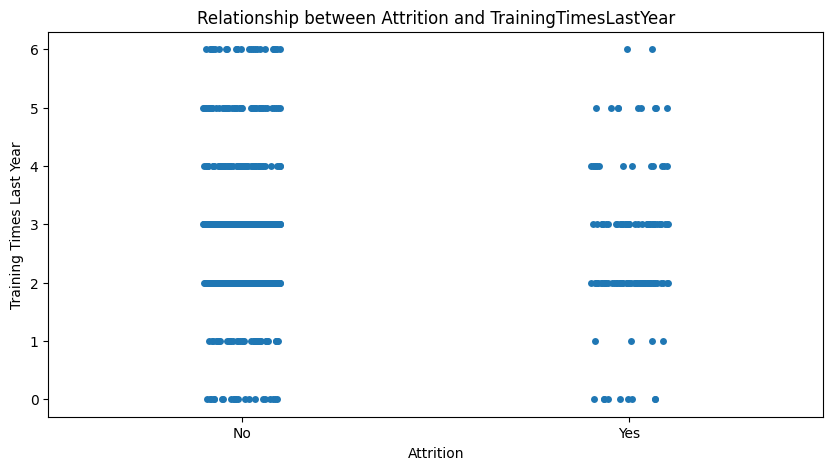

In [275]:
plt.figure(figsize=(10, 5))
sns.stripplot(x='Attrition', y='TrainingTimesLastYear', data=df, jitter=True)
plt.title('Relationship between Attrition and TrainingTimesLastYear')
plt.xlabel('Attrition')
plt.ylabel('Training Times Last Year')
plt.show()

* Employees who left  also show a notable presence at 0 or 1 training session, indicating that minimal training is common among those who left.

* There are employees in both groups who have attended up to 6 training sessions in the last year, suggesting that high levels of training do not necessarily prevent attrition.

* there is no clear relationship between the number of training sessions attended and employee attrition


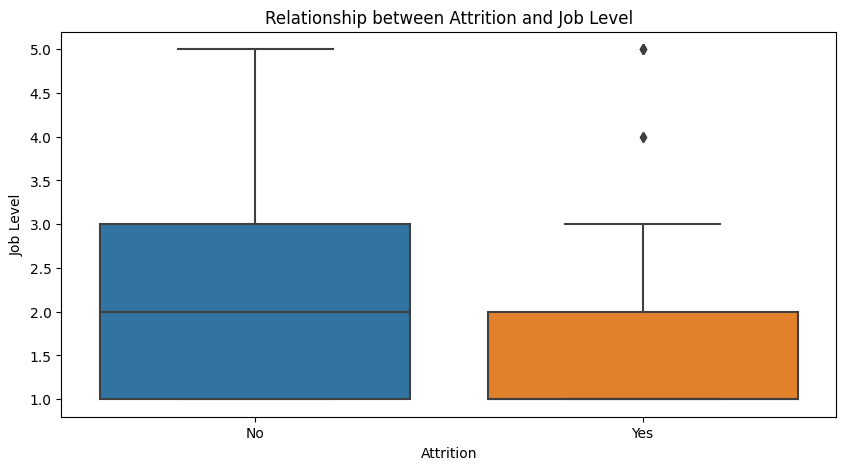

In [276]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Attrition', y='JobLevel', data=df)
plt.title('Relationship between Attrition and Job Level')
plt.xlabel('Attrition')
plt.ylabel('Job Level')
plt.show()

There are equal numbers of people who left work with a low job level, but there are people who left work with a high job level,However, with a higher job level they have a greater chance of not leaving work

### Bad workplace culture

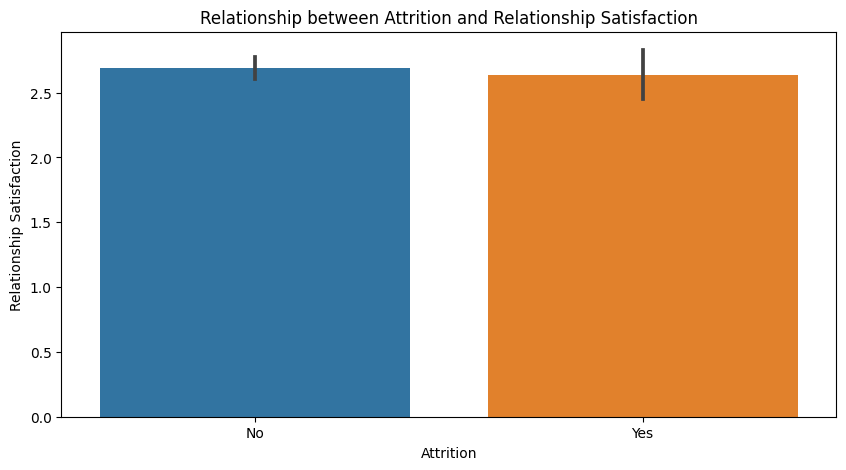

In [277]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Attrition', y='RelationshipSatisfaction', data=df)
plt.title('Relationship between Attrition and Relationship Satisfaction')
plt.xlabel('Attrition')
plt.ylabel('Relationship Satisfaction')
plt.show()

no effect

C:\Users\User\AppData\Local\Temp\ipykernel_5824\2778406324.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Attrition', y='EnvironmentSatisfaction', data=df, ci=None)


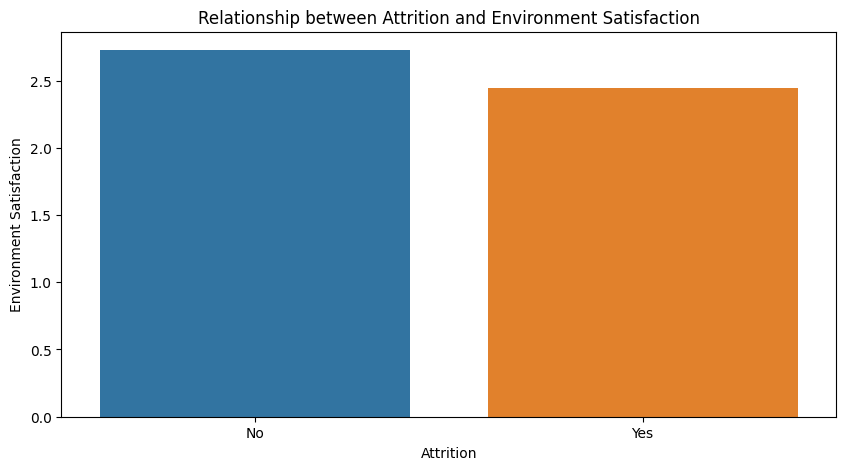

In [278]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Attrition', y='EnvironmentSatisfaction', data=df, ci=None)
plt.title('Relationship between Attrition and Environment Satisfaction')
plt.xlabel('Attrition')
plt.ylabel('Environment Satisfaction')
plt.show()


There is an effect of the environment on staying at work, but it is not significant

In [279]:
categorical_columns = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'Over18', 'OverTime','JobRole']
for col in categorical_columns:
    print(f"{df[col].value_counts()}\n")


BusinessTravel
Travel_Rarely        537
Travel_Frequently    153
Non-Travel            85
Name: count, dtype: int64

Department
Research & Development    511
Sales                     234
Human Resources            30
Name: count, dtype: int64

EducationField
Life Sciences       325
Medical             241
Marketing            88
Technical Degree     63
Other                43
Human Resources      15
Name: count, dtype: int64

Gender
Male      462
Female    313
Name: count, dtype: int64

Over18
Y    775
Name: count, dtype: int64

OverTime
No     559
Yes    216
Name: count, dtype: int64

JobRole
Sales Executive              158
Research Scientist           155
Laboratory Technician        129
Manufacturing Director        77
Healthcare Representative     63
Manager                       63
Research Director             56
Sales Representative          50
Human Resources               24
Name: count, dtype: int64



The 'Over18' column contains the same value (Y) for all rows,we are removing these columns from the DataFrame.

In [280]:
del df['Over18']
categorical_columns.remove('Over18')

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

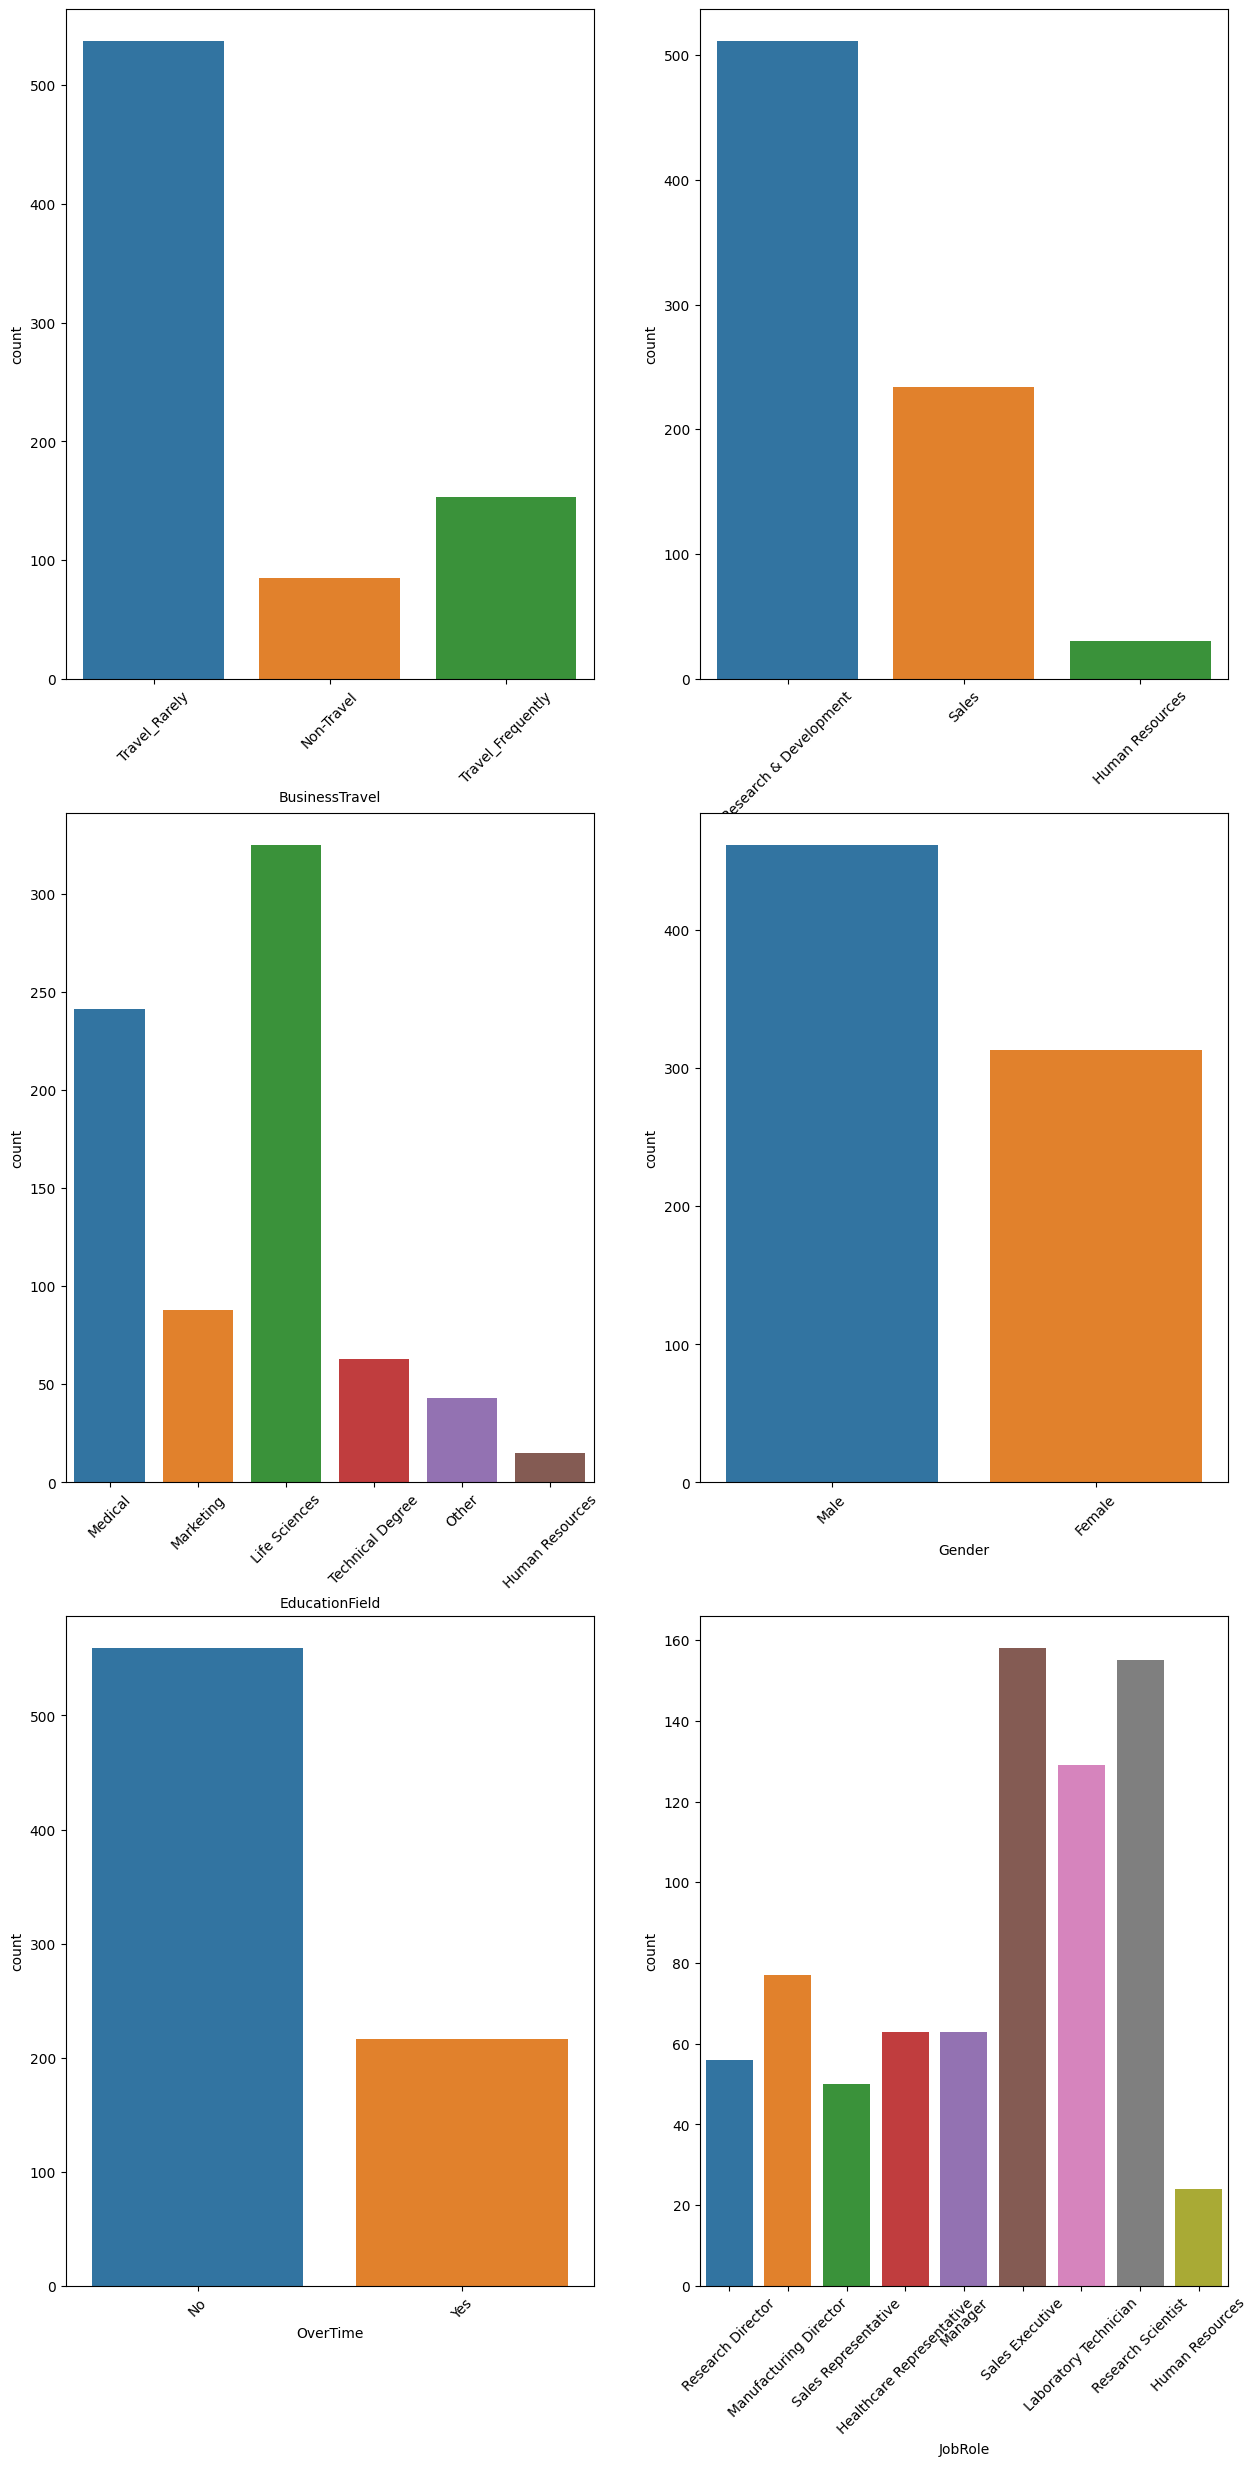

In [281]:
fig,axes = plt.subplots(4,2,figsize=(15,40))
col=0
for i in range(4):
    for j in range(2):
        if col >= len(categorical_columns):
            axes[i,j].set_visible(False) 
            continue
        sns.countplot(ax=axes[i, j],data=df, x=categorical_columns[col])
        axes[i,j].tick_params(axis='x', rotation=45)
        col+=1

plt.tight_layout

* There is a gender imbalance, with more male employees than female employees.
* Job Roles: Research-related roles are predominant, which aligns with the large number of employees in the Research and Development department.
* Travel Frequency: Most employees travel rarely, which could indicate the nature of the job roles that do not require frequent travel.

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

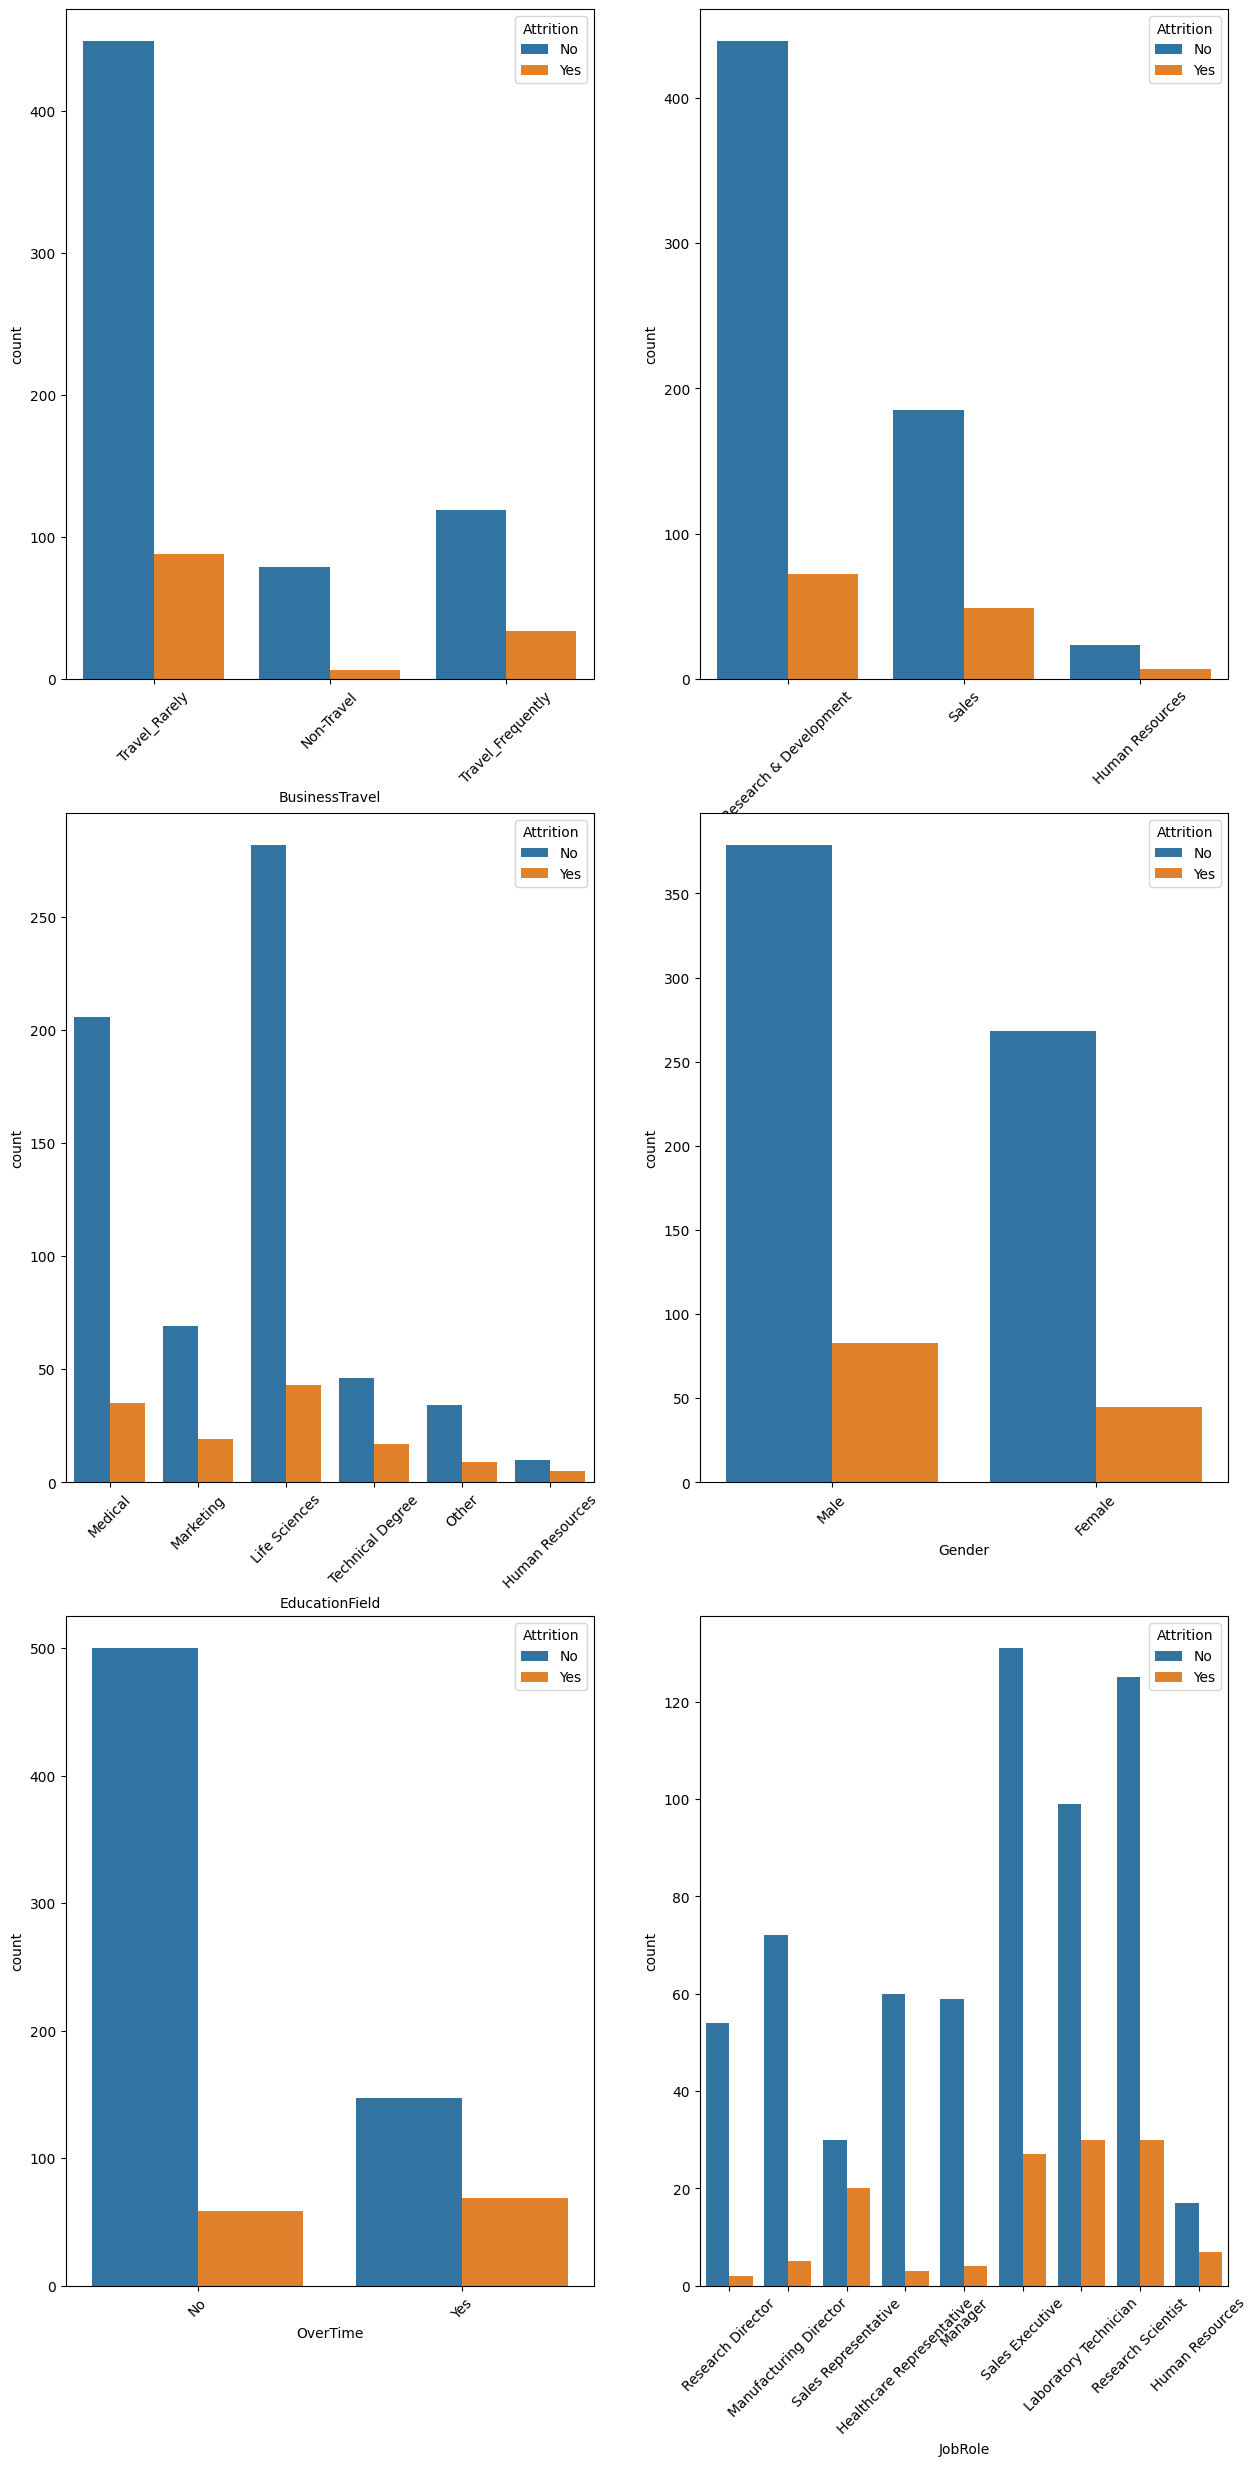

In [282]:
fig,axes = plt.subplots(4,2,figsize=(15,40))
col=0
for i in range(4):
    for j in range(2):
        if col >= len(categorical_columns):
            axes[i,j].set_visible(False) 
            continue
        sns.countplot(ax=axes[i, j],data=df, x=categorical_columns[col],hue='Attrition')
        axes[i,j].tick_params(axis='x', rotation=45)
        col+=1

plt.tight_layout

* There is no effect of gender on leaving work
* Those working overtime are more likely to leave work
* research director the least leave work

## Encoding

In [283]:
df['Attrition'] = df['Attrition'].map({'No':0,'Yes':1})
df['OverTime'] = df['OverTime'].map({'No':0,'Yes':1})
df['Gender'] = df['Gender'].map({'Male':0,'Female':1})
df['BusinessTravel'] = df['BusinessTravel'].map({'Non-Travel':0,'Travel_Frequently':1,'Travel_Rarely':2})
df['MaritalStatus'] = df['MaritalStatus'].map({'Divorced':0,'Single':1,'Married':2})

In [284]:
department_dummies = pd.get_dummies(df['Department'], prefix='Department',drop_first=True)
education_field_dummies = pd.get_dummies(df['EducationField'], prefix='EducationField',drop_first=True)
job_role_dummies = pd.get_dummies(df['JobRole'], prefix='JobRole',drop_first=True)

df = pd.concat([df, department_dummies], axis=1)
df = pd.concat([df, education_field_dummies], axis=1)
df = pd.concat([df, job_role_dummies], axis=1)

In [285]:
del df['Department']
del df['EducationField']
del df['JobRole']

## Split the dataset 

In [286]:
X = df.drop('Attrition',axis=1)
y = df['Attrition']

### Imblance target 
I will use over-sampling to resolve the imbalance in the target value

In [287]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy=1)
X,y = ros.fit_resample(X,y)

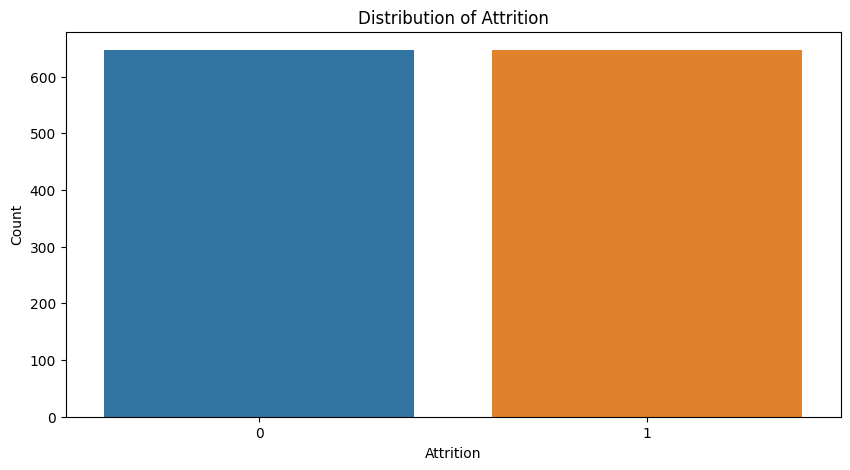

In [288]:
plt.figure(figsize=(10, 5))
sns.countplot(x=y)
plt.title('Distribution of Attrition')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

it's balance

### Scaling the dataset

In [289]:
scaler_standard = StandardScaler()
X = scaler_standard.fit_transform(X)

In [290]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modling

In [291]:
gb = GradientBoostingClassifier(n_estimators=200)
gb.fit(X_train, y_train)
train_acc = gb.score(X_train, y_train)
test_acc = gb.score(X_test, y_test)

print(f"Gradient Boosting: Training: {train_acc} - Testing: {test_acc}")

Gradient Boosting: Training: 0.996135265700483 - Testing: 0.9498069498069498


In [292]:
y_pred = gb.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[115   8]
 [  5 131]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       123
           1       0.94      0.96      0.95       136

    accuracy                           0.95       259
   macro avg       0.95      0.95      0.95       259
weighted avg       0.95      0.95      0.95       259



## Recommendations

Based on the conclusions drawn from the analysis, the following recommendations are suggested:

1. **Enhance Job Satisfaction**: Implement programs to improve job satisfaction, especially for employees with satisfaction levels below 3. This could include regular feedback, recognition, and career development opportunities.

2. **Promote Career Growth**: Ensure timely promotions and clear career progression paths to retain employees, particularly those who have not been promoted in the last 0-5 years.

3. **Work-Life Balance**: Foster a healthy work-life balance by providing flexible work arrangements and managing workloads to prevent excessive overtime.

4. **Training Programs**: Focus on the quality and relevance of training programs rather than the number of sessions. Tailor training to meet employees' career goals and job requirements.

5. **Competitive Compensation**: Review and adjust compensation packages to ensure they are competitive and reflect employees' performance and contributions.

6. **Improve Workplace Culture**: Enhance the work environment and culture to foster a supportive and engaging atmosphere, which can help reduce attrition.
